In [26]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

In [2]:
base_options = python.BaseOptions(model_asset_path='static/model/efficientdet_lite0.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

In [7]:
#save image
cap = cv2.VideoCapture(0)
success, image = cap.read()
print(success)
if success:
    cv2.imwrite('static/images/test.jpg', image)
cap.release()

True


In [12]:
image = cv2.imread('static/images/test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
np_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
results = detector.detect(np_image)

In [20]:
results

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=50, origin_y=123, width=502, height=355), categories=[Category(index=None, score=0.88671875, display_name=None, category_name='person')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=2, origin_y=285, width=161, height=188), categories=[Category(index=None, score=0.69921875, display_name=None, category_name='person')], keypoints=[])])

In [21]:
def visualize(image,detection_result):
    MARGIN = 10
    ROW_SIZE = 10
    FONT_SIZE = 1
    FONT_THICKNESS = 1
    TEXT_COLOR = (255, 0, 0)
    for detection in detection_result.detections:
        bbox = detection.bounding_box
        start_point = bbox.origin_x, bbox.origin_y
        end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
        cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)
    
        # Draw label and score
        category = detection.categories[0]
        category_name = category.category_name
        probability = round(category.score, 2)
        result_text = f'{category_name} {probability}'
        text_location = (MARGIN + bbox.origin_x, MARGIN + ROW_SIZE + bbox.origin_y)
        
        cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)
        
    return image

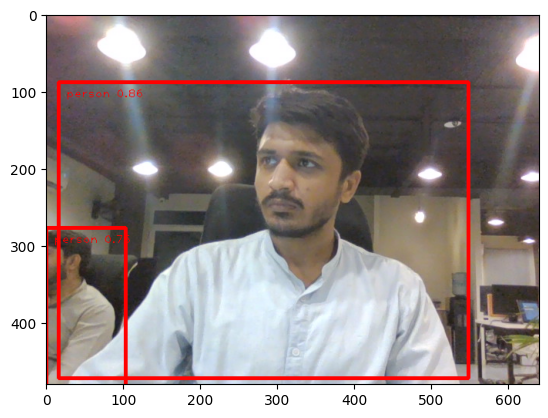

In [28]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
annotated_image = visualize(image, results)

plt.imshow(annotated_image)
plt.show()

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    success, image = cap.read()
    if not success:
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    np_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
    results = detector.detect(np_image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    annotated_image = visualize(image, results)
    
    cv2.imshow('MediaPipe Object Detection', image)
    if cv2.waitKey(5) & 0xFF == 27:
        break
cap.release()


KeyboardInterrupt: 

In [25]:
cap.release()
cv2.destroyAllWindows()